In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../source/')
import DataProcessor as dp

In [2]:
fridayDataSet: pd.DataFrame = pd.read_csv(
    "../verisetleri/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv", low_memory=False)

In [3]:
fridayDataSet[" Label"].unique()

array(['BENIGN', 'DDoS'], dtype=object)

In [4]:
dataProcessor: dp.DataProcessor = dp.DataProcessor(fridayDataSet)
scaledData = dataProcessor.min_max_scaler(fridayDataSet)
print("Include NaN: ", np.any(np.isnan(scaledData.drop([" Label"], axis=1))))

Include NaN:  False


In [5]:
bestFeatureFrame = dataProcessor.chi_square_feature_selector(scaledData)
bestFeatures = bestFeatureFrame.Specs

Output of ChiSquare Feature Selector
                      Specs         Score
43           URG Flag Count  41617.123081
0          Destination Port  39345.753421
10    Bwd Packet Length Max  32325.617363
13    Bwd Packet Length Std  22329.356165
12   Bwd Packet Length Mean  19963.264339
48     Avg Bwd Segment Size  19963.264339
34        Max Packet Length  14957.905366
35       Packet Length Mean  14596.850204
23            Bwd IAT Total  14066.375959
36        Packet Length Std  13947.536377


In [6]:
corrDataframe  = pd.concat([scaledData[bestFeatures], scaledData[" Label"]], axis = 1)
corrDataframe = corrDataframe.reset_index()

In [7]:
corrDataframe = dataProcessor.label_encoder(corrDataframe)

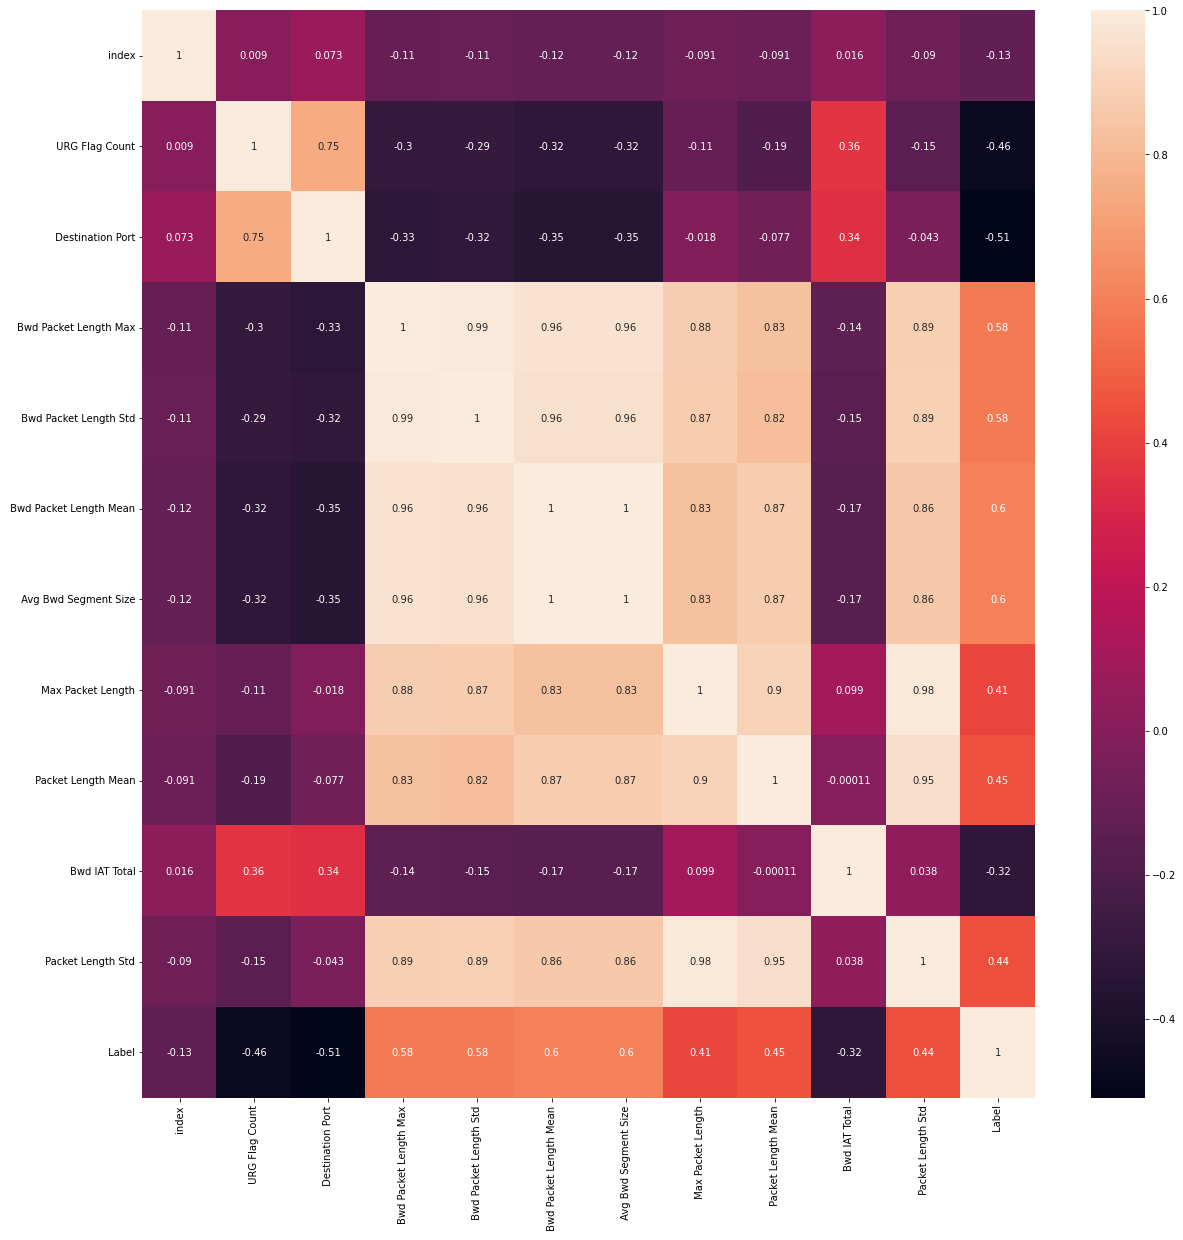

In [8]:
dataProcessor.print_correlation_matrix(corrDataframe)

In [9]:
corrDataframe

,index,URG Flag Count,Destination Port,Bwd Packet Length Max,Bwd Packet Length Std,Bwd Packet Length Mean,Avg Bwd Segment Size,Max Packet Length,Packet Length Mean,Bwd IAT Total,Packet Length Std,Label
0,0,0.0,0.837225,0.000000,0.0,0.000000,0.000000,0.000514,0.003098,0.0,0.0,0
1,1,1.0,0.840109,0.000514,0.0,0.001034,0.001034,0.000514,0.003098,0.0,0.0,0
2,2,1.0,0.840124,0.000514,0.0,0.001034,0.001034,0.000514,0.003098,0.0,0.0,0
3,3,1.0,0.705548,0.000514,0.0,0.001034,0.001034,0.000514,0.003098,0.0,0.0,0
4,4,0.0,0.837194,0.000000,0.0,0.000000,0.000000,0.000514,0.003098,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
225736,225740,1.0,0.936550,0.000514,0.0,0.001034,0.001034,0.000514,0.003098,0.0,0.0,0
225737,225741,1.0,0.936611,0.000514,0.0,0.001034,0.001034,0.000514,0.003098,0.0,0.0,0
225738,225742,1.0,0.936565,0.000514,0.0,0.001034,0.001034,0.000514,0.003098,0.0,0.0,0
225739,225743,0.0,0.935772,0.000000,0.0,0.000000,0.000000,0.000514,0.003098,0.0,0.0,0


In [10]:
import MLMethodBuilder as mlbuilder;
mlBuilder = mlbuilder.MLMethodBuilder(corrDataframe)

Generic Method Builder is invoke.
ML Builder is invoke


In [11]:
mlBuilder.NaiveBayes()

Data will split.
NaiveBayes Results calculated in: 0.09994816780090332 s
Confusion Matrix of Naive Bayes Classifier: 
 [[10744  8823]
 [ 2329 23253]]


Calculated Metrics: 

accuracy: 0.7529956366696937

precision: 0.9089594245954187

recall: 0.724934530490086

f1 score: 0.8065836484095876


In [15]:
from DLMethodBuilder import DLMethodBuilder
dlBuilder = DLMethodBuilder(corrDataframe)

Generic Method Builder is invoke.
DL Builder is invoke


In [16]:
dlBuilder.ConvolutionalNeuralNetwork()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 10, 64)            256       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 5, 64)            0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 320)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 321       
                                                                 
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________
